In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Canonical plots

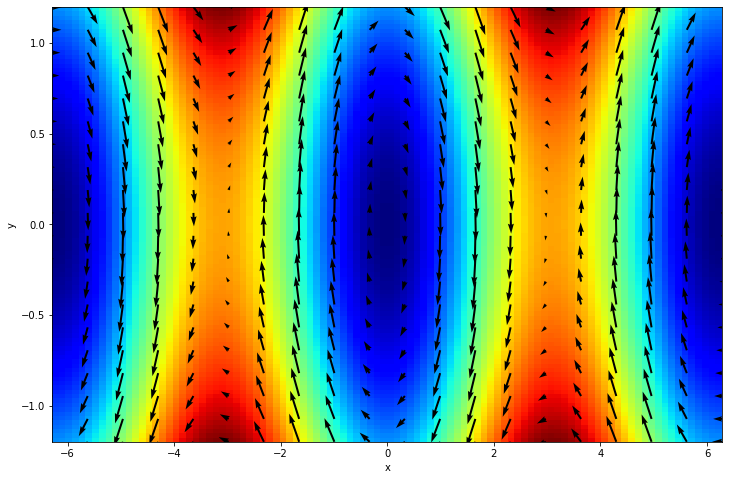

In [2]:
H = lambda x: 0.5*x[1]**2+(1-np.cos(x[0]))
spacedim = [(-2*np.pi, 2*np.pi), (-1.2, 1.2)]
# spacedim = [(12*np.pi, 16*np.pi), (-1.2, 1.2)]

x,y = np.meshgrid(np.linspace(spacedim[0][0],spacedim[0][1],20),np.linspace(spacedim[1][0],spacedim[1][1],20))
x1,y1 = np.meshgrid(np.linspace(spacedim[0][0],spacedim[0][1],100),np.linspace(spacedim[1][0],spacedim[1][1],100))

trueH=H([x1,y1])

plt.figure(figsize = (12,8))
plt.imshow(trueH,plt.cm.jet,extent=[spacedim[0][0],spacedim[0][1],spacedim[1][0],spacedim[1][1]], aspect = 'auto',vmax=np.max(trueH))
# plt.colorbar()
plt.quiver(x,y,y,-np.sin(x), angles='xy', scale_units='xy')
plt.xlabel("x")
plt.ylabel("y")
# plt.title("Simple Pendulum", fontsize = 30)
plt.show()

In [3]:
! git clone https://github.com/zykhoo/predicting_hamiltonian_dynamics.git
!pip install scipy==1.6.3
!pip install scikit_optimize==0.8.1
!pip install scikit_learn==0.24.2

Cloning into 'predicting_hamiltonian_dynamics'...
remote: Enumerating objects: 716, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 716 (delta 2), reused 0 (delta 0), pack-reused 708
Receiving objects: 100% (716/716), 161.18 KiB | 4.60 MiB/s, done.
Resolving deltas: 100% (377/377), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 27.4 MB 66.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pk

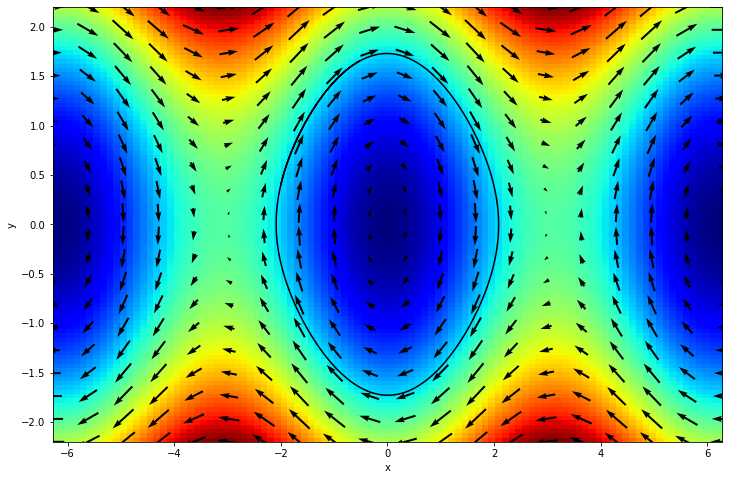

In [4]:
from predicting_hamiltonian_dynamics import groundtruth_2dim
H = lambda x: 1/2*x[1]**2+(1-np.cos(x[0]))
spacedim = [(-2*np.pi, 2*np.pi), (-1.2, 1.2)]

x,y = np.meshgrid(np.linspace(-2*np.pi,2*np.pi,20),np.linspace(-2.2,2.2,20))
x1,y1 = np.meshgrid(np.linspace(-2*np.pi,2*np.pi,100),np.linspace(-2.2,2.2,100))

trueH=H([x1,y1])

plt.figure(figsize = (12,8))
# plt.imshow(trueH,plt.cm.jet,extent=[spacedim[0][0],spacedim[0][1],spacedim[1][0],spacedim[1][1]],aspect='auto',vmax=np.max(trueH))
# plt.colorbar()
groundtruth = groundtruth_2dim.classicTrajectory(np.asarray([[-2.],[0.4]]),f1 = lambda x : x[1],f2 = lambda x : -np.sin(x[0]),h = 0.01,N=1000,n_h = 1)
# plt.quiver(groundtruth[1][0,:], groundtruth[1][1,:],f1(groundtruth[1][:,:]), f2(groundtruth[1][:,:]), scale = 10, angles='xy', scale_units='xy', pivot = 'middle')
plt.plot(groundtruth[1][0,:], groundtruth[1][1,:], color = 'black')
plt.quiver(x,y,y,-np.sin(x), angles='xy', scale_units='xy', pivot = 'middle')
plt.plot()
plt.xlabel("x")
plt.ylim([-2.2,2.2])
plt.xlim([-2*np.pi,2*np.pi])
plt.ylabel("y")
plt.imshow(trueH,plt.cm.jet,extent=[-2*np.pi,2*np.pi,-2.2,2.2],aspect='auto',vmax=np.max(trueH))

# plt.title("Simple Pendulum", fontsize = 30)
plt.show()

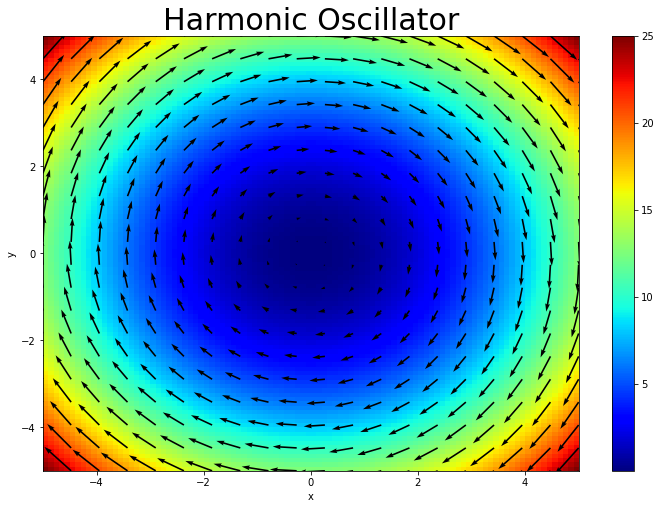

In [5]:
H = lambda x: 1/2*x[1]**2+1/2*x[0]**2
spacedim=[(-5.,5.), (-5.,5.)]

x,y = np.meshgrid(np.linspace(spacedim[0][0],spacedim[0][1],20),np.linspace(spacedim[1][0],spacedim[1][1],20))
x1,y1 = np.meshgrid(np.linspace(spacedim[0][0],spacedim[0][1],100),np.linspace(spacedim[1][0],spacedim[1][1],100))

trueH=H([x1,y1])

plt.figure(figsize = (12,8))
plt.imshow(trueH,plt.cm.jet,extent=[spacedim[0][0],spacedim[0][1],spacedim[1][0],spacedim[1][1]],aspect='auto',vmax=np.max(trueH))
plt.colorbar()
plt.quiver(x,y,y,-(x), scale = 100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Harmonic Oscillator", fontsize = 30)
plt.show()

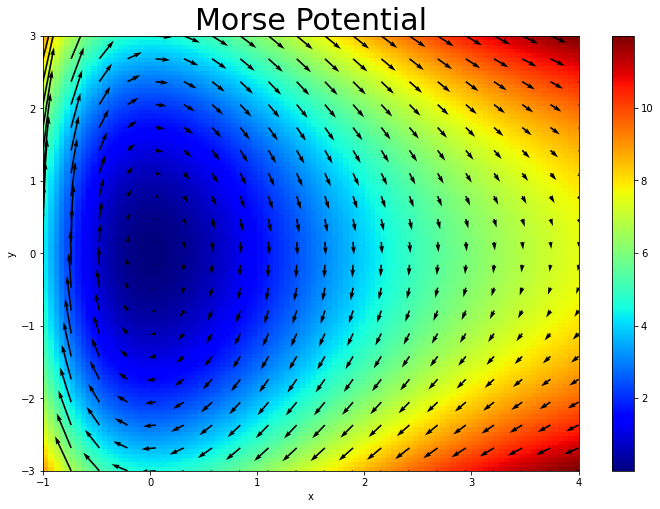

In [6]:
D=10
alpha=0.5
f = lambda z: -2*D*alpha*(np.exp(-alpha*z[0])-np.exp(-2*alpha*z[0]))
H = lambda z: 1/2*np.asarray(z[1])**2 + D*(1-np.exp(-alpha*z[0]))**2
spacedim=[(-1., 4.), (-3.0, 3.0)]

x,y = np.meshgrid(np.linspace(spacedim[0][0],spacedim[0][1],20),np.linspace(spacedim[1][0],spacedim[1][1],20))
x1,y1 = np.meshgrid(np.linspace(spacedim[0][0],spacedim[0][1],100),np.linspace(spacedim[1][0],spacedim[1][1],100))

trueH=H([x1,y1])

plt.figure(figsize = (12,8))
plt.imshow(trueH,plt.cm.jet,extent=[spacedim[0][0],spacedim[0][1],spacedim[1][0],spacedim[1][1]],aspect='auto',vmax=np.max(trueH))
plt.colorbar()
plt.quiver(x,y,y,f([x,y]), scale = 100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Morse Potential", fontsize = 30)
plt.show()

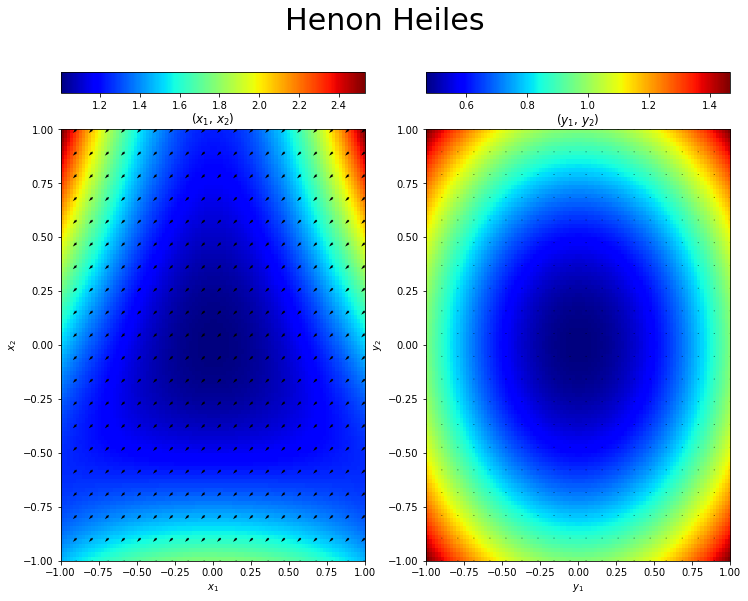

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

mu = 0.8
V = lambda x: 1/2*(x[0]**2+x[1]**2) + mu*(x[0]**2*x[1]-x[1]**3/3)
f = lambda x: -(x[:2] + mu*(np.array([2*x[0]*x[1],x[0]**2 - x[1]**2])))
H = lambda x: 1/2*(x[2]**2+x[3]**2) + V(x)
h = 0.3
spacedim=[(-1., 1.), (-1., 1.),(-0., 0.), (-0., 0.)]

x,y = np.meshgrid(np.linspace(spacedim[0][0],spacedim[0][1],20),np.linspace(spacedim[1][0],spacedim[1][1],20))
x1,y1 = np.meshgrid(np.linspace(spacedim[0][0],spacedim[0][1],100),np.linspace(spacedim[1][0],spacedim[1][1],100))

trueHq=H([x1,y1,-1,-1])
trueHp=H([-1,-1,x1,y1])

fig,ax = plt.subplots(1,2,figsize = (12,9))
im1 = ax[0].imshow(np.flip(trueHq,0),plt.cm.jet,extent=[spacedim[0][0],spacedim[0][1],spacedim[1][0],spacedim[1][1]],aspect='auto',vmax=np.max(trueHq))
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('top', size='5%', pad=0.5)
fig.colorbar(im1, cax=cax, orientation='horizontal')
ax[0].quiver(x,y,-1,-1, scale = 80)
ax[0].set_xlabel(r"$x_1$")
ax[0].set_ylabel(r"$x_2$")
ax[0].title.set_text(r"($x_1$, $x_2$)")
im2 = ax[1].imshow(trueHp,plt.cm.jet,extent=[spacedim[0][0],spacedim[0][1],spacedim[1][0],spacedim[1][1]],aspect='auto',vmax=np.max(trueHp))
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('top', size='5%', pad=0.5)
fig.colorbar(im2, cax=cax, orientation='horizontal')
ax[1].quiver(x,y,f([0,0,x,y])[0],f([0,0,x,y])[1], scale = 80)
ax[1].set_xlabel(r"$y_1$")
ax[1].set_ylabel(r"$y_2$")
ax[1].title.set_text(r"($y_1$, $y_2$)")
fig.suptitle("Henon Heiles", fontsize = 30)
plt.show()

# Abstract systems

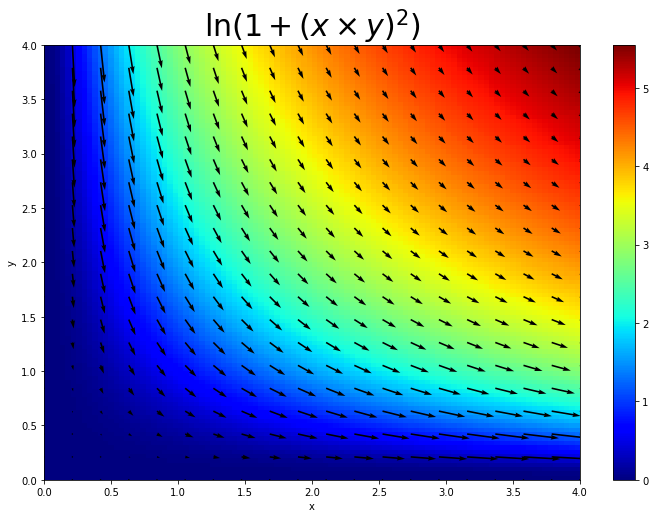

In [8]:
H = lambda x,y: np.log(1+(x*y)**2)
f1 = lambda x,y: 2*y*x**2/(1+(x*y)**2) # dH/dy
f2 = lambda x,y: -2*x*y**2/(1+(x*y)**2) # -dH/dx
# spacedim = [(0.,4.),(0.,4.)]
spacedim = [(0.,4.),(0.,4.)]

x,y = np.meshgrid(np.linspace(spacedim[0][0],spacedim[0][1],20),np.linspace(spacedim[1][0],spacedim[1][1],20))
x1,y1 = np.meshgrid(np.linspace(spacedim[0][0],spacedim[0][1],100),np.linspace(spacedim[1][0],spacedim[1][1],100))

trueH=H(x1,y1)

plt.figure(figsize = (12,8))
plt.imshow(np.flip(trueH,0),plt.cm.jet,extent=[spacedim[0][0],spacedim[0][1],spacedim[1][0],spacedim[1][1]],aspect='auto',vmax=np.max(trueH))
plt.colorbar()
plt.quiver(x,y,f1(x,y),f2(x,y), scale = 50) #x,y,dH/dy,-dH/dx
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"$\ln(1+(x\times y)^2)$", fontsize = 30)
plt.show()

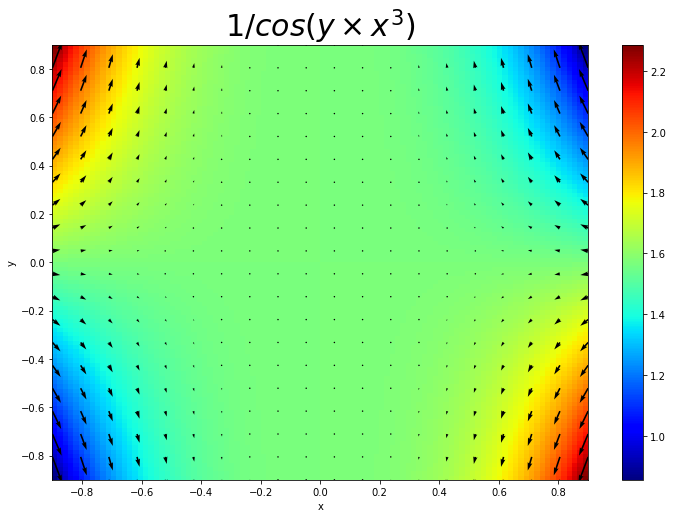

In [9]:
H = lambda x,y: np.arccos(y*x**3)
f1 = lambda x,y: -x**3 / np.sqrt(1-x**6 * y**2) # dH/dy
f2 = lambda x,y: 3*y*x**2 / np.sqrt(1-y**2 * x**6) # -dH/dx
spacedim = [(-0.9,0.9),(-0.9,0.9)]

x,y = np.meshgrid(np.linspace(spacedim[0][0],spacedim[0][1],20),np.linspace(spacedim[1][0],spacedim[1][1],20))
x1,y1 = np.meshgrid(np.linspace(spacedim[0][0],spacedim[0][1],100),np.linspace(spacedim[1][0],spacedim[1][1],100))

trueH=H(x1,y1)

plt.figure(figsize = (12,8))
plt.imshow(np.flip(trueH,0),plt.cm.jet,extent=[spacedim[0][0],spacedim[0][1],spacedim[1][0],spacedim[1][1]],aspect='auto',vmax=np.max(trueH))
plt.colorbar()
plt.quiver(x,y,f1(x,y),f2(x,y), scale = 50) #x,y,dH/dy,-dH/dx
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"$1/cos(y \times x^3)$", fontsize = 30)
plt.show()

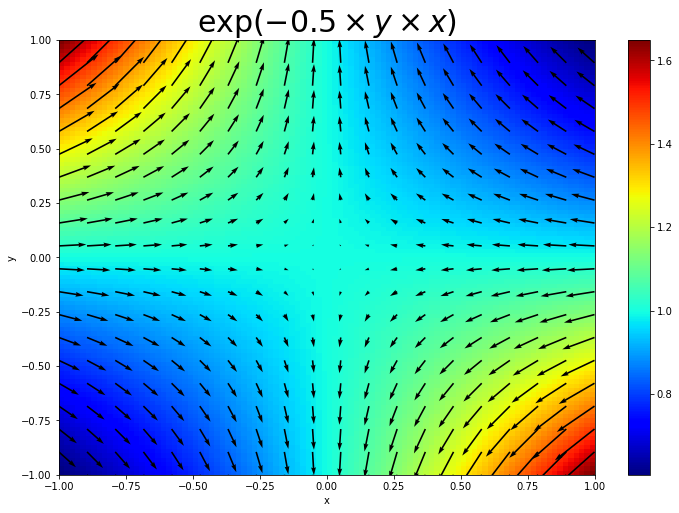

In [10]:
H = lambda x,y: np.exp(-0.5*y*x)
f1 = lambda x,y: -0.5*x*np.exp(-0.5*y*x) # dH/dy
f2 = lambda x,y: 0.5*y*np.exp(-0.5*y*x) # -dH/dx
spacedim = [(-1.,1.),(-1.,1.)]

x,y = np.meshgrid(np.linspace(spacedim[0][0],spacedim[0][1],20),np.linspace(spacedim[1][0],spacedim[1][1],20))
x1,y1 = np.meshgrid(np.linspace(spacedim[0][0],spacedim[0][1],100),np.linspace(spacedim[1][0],spacedim[1][1],100))

trueH=H(x1,y1)

plt.figure(figsize = (12,8))
plt.imshow(np.flip(trueH,0),plt.cm.jet,extent=[spacedim[0][0],spacedim[0][1],spacedim[1][0],spacedim[1][1]],aspect='auto',vmax=np.max(trueH))
plt.colorbar()
plt.quiver(x,y,f1(x,y),f2(x,y), scale = 10) #x,y,dH/dy,-dH/dx
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"$\exp(-0.5\times y\times x)$", fontsize = 30)
plt.show()

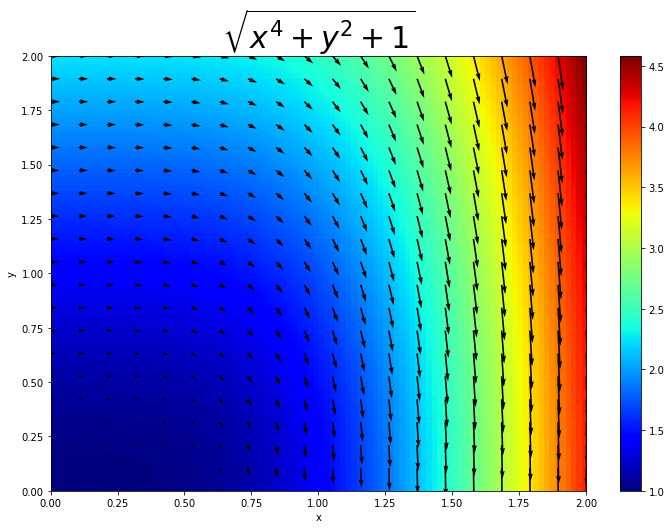

In [11]:
H = lambda x,y: (x**4 + y**2+1)**0.5
f1 = lambda x,y: 0.5*2*(y)/np.sqrt(x**4 + y**2 +1) # dH/dy
f2 = lambda x,y: -0.5*4*(x**3)/np.sqrt(x**4 + y**2 +1) # -dH/dx
spacedim = [(0.0,2.0),(0.0,2.0)]

x,y = np.meshgrid(np.linspace(spacedim[0][0],spacedim[0][1],20),np.linspace(spacedim[1][0],spacedim[1][1],20))
x1,y1 = np.meshgrid(np.linspace(spacedim[0][0],spacedim[0][1],100),np.linspace(spacedim[1][0],spacedim[1][1],100))

trueH=H(x1,y1)

plt.figure(figsize = (12,8))
plt.imshow(np.flip(trueH,0),plt.cm.jet,extent=[spacedim[0][0],spacedim[0][1],spacedim[1][0],spacedim[1][1]],aspect='auto',vmax=np.max(trueH))
plt.colorbar()
plt.quiver(x,y,f1(x,y),f2(x,y), scale = 50) #x,y,dH/dy,-dH/dx
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"$\sqrt{x^4+y^2+1}$", fontsize = 30)
plt.show()

Plots for the introduction


In [12]:
f1 = lambda x: x[1]
f2 = lambda x: -np.sin(x[0])
spacedim=[(-2*np.pi, 2*np.pi), (-1.2, 1.2)]

In [13]:
!pip install scipy==1.6.3
!pip install scikit_optimize==0.8.1
!pip install scikit_learn==0.24.2
! git clone https://github.com/zykhoo/predicting_hamiltonian_dynamics.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'predicting_hamiltonian_dynamics' already exists and is not an empty directory.


In [14]:
from predicting_hamiltonian_dynamics import groundtruth_2dim
ini = 64
h = 0.1
start, final = groundtruth_2dim.CreateTrainingDataTrajClassicIntRandom(1,ini,spacedim,h,f1,f2,seed = 1,n_h = 1)

delta = start.copy()
delta[0,:] = f1(start)
delta[1,:] = f2(start)

In [ ]:
from predicting_hamiltonian_dynamics.models import NN_2dim
from predicting_hamiltonian_dynamics.models import PINN_2dim
import torch

if torch.cuda.is_available():
  device=torch.device('cuda')
else:
  device=torch.device('cpu')
torch.manual_seed(1)
torch.cuda.manual_seed_all(1)


wholemat, evalmat = NN_2dim.data_preprocessing(start, delta, device)

import torch.optim as optim
import time 

# net = NN_2dim.Net(2,16,2)
# starttime = time.time() 
# net = NN_2dim.train(net, wholemat, evalmat, optimizer=optim.Adam(net.parameters(), lr=0.001), batchsize=10, iter=1600, )
# traintime = time.time()-starttime
net=PINN_2dim.Net(2,16,1)
net,avg_vallosses,avg_lossli,avg_f1li,avg_f2li,avg_f3li,avg_f4li=PINN_2dim.train(net,bs=10,num_epoch=5000,initial_conditions=64,device=device,
                                                                                    wholemat=wholemat,evalmat=evalmat,x0=0.,H0=0.,dim=2,LR=0.001,patience=500,c1=1,c2=1,c3=1,c4=1)

/content/predicting_hamiltonian_dynamics/models/PINN_2dim.py:218: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x=Variable(torch.tensor(mat[:,:dim]).float(),requires_grad=True)
/content/predicting_hamiltonian_dynamics/models/PINN_2dim.py:223: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(net.parameters(), 1)


 
epoch= 0  time= 0.11442852020263672  loss= 1.3772683342297871  val_loss= 1.548320233821869  f1= 0.6083250091689225  f2= 0.6054031824901913  f3= 0.16350805883606276  f4= 3.2103600230543065e-05 percent lr= 0.001
 
epoch= 10  time= 0.259960412979126  loss= 1.292556385199229  val_loss= 1.3239482045173645  f1= 0.6685706229004632  f2= 0.6237602699047144  f3= 3.2363099885894066e-05  f4= 0.00019313371461607092 percent lr= 0.001
 
epoch= 20  time= 0.405332088470459  loss= 1.1789087653160095  val_loss= 1.3070663213729858  f1= 0.6321706787368807  f2= 0.5454783075244686  f3= 6.565285441221628e-07  f4= 0.00125914462313103 percent lr= 0.001
 
epoch= 30  time= 0.557898759841919  loss= 1.146564394235611  val_loss= 1.2607223987579346  f1= 0.6122994191834098  f2= 0.5319988285846812  f3= 8.565895512901989e-07  f4= 0.00226529685174679 percent lr= 0.001
 
epoch= 40  time= 0.7100389003753662  loss= 0.9867940048376719  val_loss= 1.2048762440681458  f1= 0.46092204656335417  f2= 0.5212411281754338  f3= 4.336

In [ ]:
# xxshort,yyshort = np.linspace(spacedim[0][0], spacedim[0][1], 20), np.linspace(spacedim[1][0], spacedim[1][1], 20)
xxshort,yyshort = np.linspace(spacedim[0][0], spacedim[0][1], 20), np.linspace(-2.,2., 20)
xshort,yshort = np.meshgrid(xxshort,yyshort)
xflat,yflat = np.ravel(xshort), np.ravel(yshort)
xnet,ynet = xflat.copy(), yflat.copy()

def get_grad(model, z,device):
		inputs=torch.autograd.Variable(torch.tensor([z[0][0],z[1][0]]), requires_grad = True).to(device)
		out=model(inputs.float())
		dH=torch.autograd.grad(out, inputs, grad_outputs=out.data.new(out.shape).fill_(1),create_graph=True)[0]
		return dH.detach().cpu().numpy()[1], -dH.detach().cpu().numpy()[0] # negative dH/dq is dp/dt

for i in range(len(xflat)):
  input = [[xflat[i]],[yflat[i]]] #torch.tensor([xflat[i], yflat[i]]).float()
  xnet[i], ynet[i] = get_grad(net, input,device)
xnet,ynet = xnet.reshape(xshort.shape), ynet.reshape(yshort.shape)

In [ ]:
def classicIntNNH_autograd(z,h,model,device):
	## classical symplectic Euler scheme
		dim = int(len(z)/2)
		q=z[:dim]
		p=z[dim:]		
		fstage = lambda stg: h * get_grad(model, np.concatenate([q+stg,p]),device)[0]

		stageold=np.zeros(dim) 
		stage = fstage(stageold) +0.
		Iter = 0

		while (np.amax(abs(stage - stageold)) > 1e-8 and Iter<1000):
			stageold = stage+0.
			stage = fstage(stage)+0.
			Iter = Iter+1
		q = q+stage
		p = p + h*get_grad(model, np.concatenate([q,p]),device)[1]
		return np.block([q,p])

def classicTrajectoryNNH_autograd(z,h,model,device,N=1):
	## trajectory computed with classicInt
  z = z.reshape(1,-1)[0]
  trj = np.zeros((len(z),N+2))
  trj[:,0] = z.copy()
  if N == 1:
    return z.reshape(-1,1), classicIntNNH_autograd(trj[:,0].reshape(-1,1),h,model,device).reshape(-1,1)
  else:
    for j in range(0,N+1):
      trj[:,j+1] = classicIntNNH_autograd(trj[:,j].reshape(-1,1).copy(),h,model,device)
  return trj[:, :-1], trj[:, 1:]

In [ ]:
longtraj = np.asarray(classicTrajectoryNNH_autograd(np.asarray([[-2.],[0.4]]),h = 0.1,model=net,device=device,N=50))
longtraj.shape

(2, 2, 51)

In [ ]:
traj_store = longtraj[1,:,:].copy()
for i in range(len(longtraj[1,0,:])):
  input = [[longtraj[1,0,i]],[longtraj[1,1,i]]] #torch.tensor([xflat[i], yflat[i]]).float()
  traj_store[0,i], traj_store[1,i] = get_grad(net, input,device)

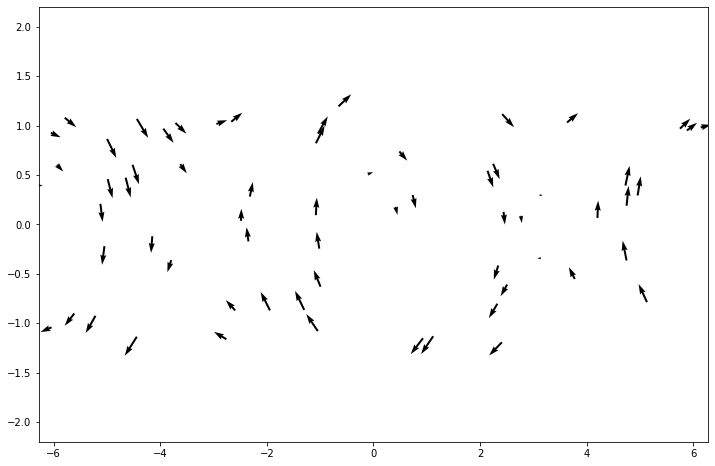

In [ ]:
plt.figure(figsize = (12,8))
plt.quiver(start[0],start[1],delta[0],delta[1], scale = 5, width = 0.003, angles='xy', scale_units='xy' ) #x,y,dH/dy,-dH/dx
# ax[0].set_title("Sampled Vector Field")
plt.ylim([-2.2,2.2])
plt.xlim([-2*np.pi,2*np.pi])
plt.show()

In [ ]:
!git clone https://github.com/zykhoo/understandingPINNs.git
from tqdm import tqdm
from understandingPINNs.PINN_loss import PINN_loss
Hamiltonian = xshort.flatten().copy()
count = 0
for i in tqdm(np.expand_dims(np.c_[np.ravel(xshort),np.ravel(yshort)],2)):
    out = PINN_loss.get_H_grad(net, i, device)
    Hamiltonian[count] = out[0]
    count+=1
Hamiltonian = Hamiltonian.reshape(xshort.shape)
# Hamiltonian

fatal: destination path 'understandingPINNs' already exists and is not an empty directory.


100%|██████████| 400/400 [00:00<00:00, 1119.99it/s]


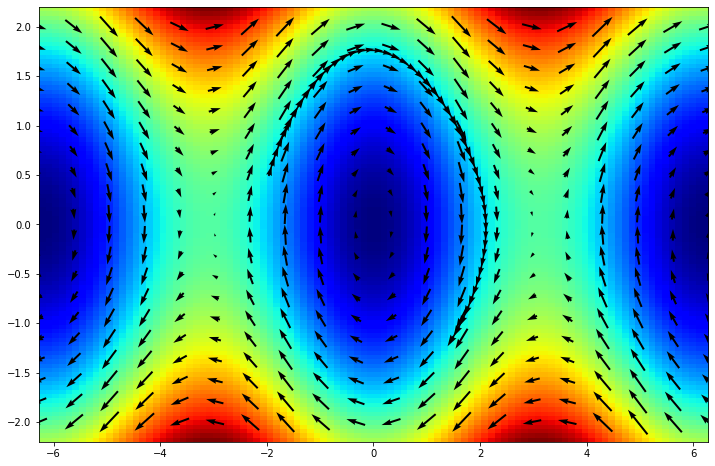

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(longtraj[1,0,:],longtraj[1,1,:], color = 'black')
plt.quiver(xshort,yshort, xnet,ynet, scale=5, pivot = 'middle', angles='xy', scale_units='xy')
# ax[1].set_title("Learned Vector Field with Predicted Trajectory")
plt.quiver(longtraj[1,0,:],longtraj[1,1,:],traj_store[0,:],traj_store[1,:], scale = 10, angles='xy', scale_units='xy') #x,y,dH/dy,-dH/dx
plt.ylim([-2.2,2.2])
plt.xlim([-2*np.pi,2*np.pi])
plt.imshow(trueH,plt.cm.jet,extent=[-2*np.pi,2*np.pi,-2.2,2.2],aspect='auto',vmax=np.max(trueH))
plt.show()

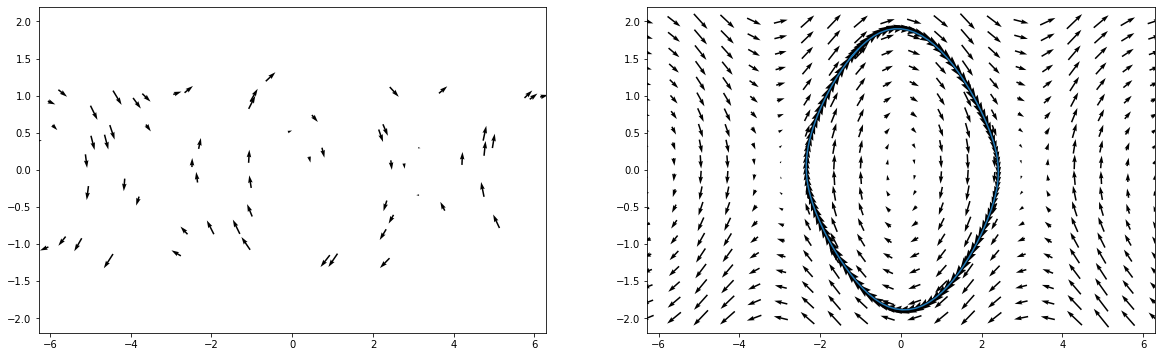

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (20,6))
ax[0].quiver(start[0],start[1],delta[0],delta[1], scale = 5, width = 0.003, angles='xy', scale_units='xy' ) #x,y,dH/dy,-dH/dx
# ax[0].set_title("Sampled Vector Field")
ax[0].set_ylim([-2.2,2.2])
ax[0].set_xlim([-2*np.pi,2*np.pi])
ax[1].plot(longtraj[1,0,:],longtraj[1,1,:])
ax[1].quiver(xshort,yshort, xnet,ynet, scale=5, pivot = 'middle', angles='xy', scale_units='xy')
# ax[1].set_title("Learned Vector Field with Predicted Trajectory")
ax[1].quiver(longtraj[1,0,:],longtraj[1,1,:],traj_store[0,:],traj_store[1,:], scale = 10, angles='xy', scale_units='xy') #x,y,dH/dy,-dH/dx
ax[1].set_ylim([-2.2,2.2])
ax[1].set_xlim([-2*np.pi,2*np.pi])
plt.show()